In [15]:
import numpy as np
import pandas as pd
import gc
import time
from pickle import dump
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from imblearn.over_sampling import SMOTE 
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [7]:
X_train = pd.read_csv("X_train_smote_oversample.csv")

In [8]:
Y_train= pd.read_csv("y_clean.csv")

In [9]:
X_test= pd.read_csv("x_test_smote_oversample.csv")

In [10]:
Y_test= pd.read_csv("y_test_smote_oversample.csv")

In [11]:
X_train["TARGET"] = Y_train["TARGET"]

In [12]:
Y_train = X_train["TARGET"]

In [13]:
X_train= X_train.drop("TARGET", axis=1)

In [17]:

Sélection des modèles de classification
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

SyntaxError: invalid syntax (2430787129.py, line 1)

In [44]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

## Select important features

In [16]:
clf = RandomForestClassifier(max_depth=10, random_state=0)

In [19]:
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [20]:
RandomForestClassifier(max_depth=10, random_state=0)

RandomForestClassifier(max_depth=10, random_state=0)

In [21]:
importances = clf.feature_importances_

In [23]:
size_most_important = 50

In [24]:
indices = np.argsort(importances)[::-1][:size_most_important]

In [25]:
importance = importances[indices]

In [26]:
importance

array([0.32856631, 0.03620141, 0.03433259, 0.03422238, 0.0334177 ,
       0.0306835 , 0.02080709, 0.02064315, 0.01971797, 0.01921783,
       0.01887233, 0.01863239, 0.01852642, 0.01815039, 0.01707877,
       0.01616368, 0.01598605, 0.01274423, 0.01186016, 0.01133574,
       0.01104504, 0.00987837, 0.00949292, 0.00916279, 0.00915659,
       0.00875592, 0.00843141, 0.00833579, 0.00715296, 0.00683765,
       0.00637255, 0.00540246, 0.0049673 , 0.004462  , 0.00442967,
       0.0043431 , 0.00417363, 0.00406875, 0.00403285, 0.00398762,
       0.00380321, 0.00378749, 0.00359335, 0.00336927, 0.00328673,
       0.00311062, 0.00310326, 0.00299965, 0.002931  , 0.00266042])

In [27]:
X_train = X_train.drop("Unnamed: 0", axis=1)

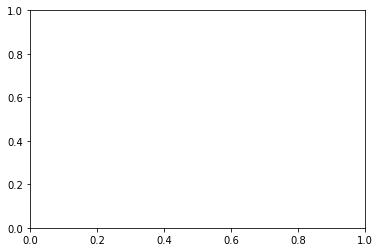

In [28]:
fig, ax = plt.subplots()

In [29]:
ax.barh(range(size_most_important), importances[indices])

<BarContainer object of 50 artists>

In [30]:
ax.set_yticks(range(size_most_important))

In [32]:
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [33]:
fig.set_size_inches(18.5, 10.5, forward=True)

In [35]:
col_useful = np.array(X_train.columns)[indices]

In [37]:
# keep only importants columns

In [36]:
X_train = X_train[col_useful]

Create cost function

In [38]:
def cout_metier(y_true, y_pred):
    '''
     plus fp est gros, plus c'est catastrophique: une erreur grave, grosse perte d'argent
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp * 10+fn

In [39]:
from sklearn.metrics import make_scorer

In [40]:
customer_cout_metier_scorer = make_scorer(cout_metier)

### Optimize hyperparameters

In [42]:
parameters = {}

In [45]:
grid = GridSearchCV(classifiers[0], parameters, scoring=customer_cout_metier_scorer)

In [47]:
grid.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3), param_grid={},
             scoring=make_scorer(cout_metier))

In [48]:
GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3), param_grid={},
             scoring=make_scorer(cout_metier))

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3), param_grid={},
             scoring=make_scorer(cout_metier))

In [49]:
grid.cv_results_

{'mean_fit_time': array([0.07683129]),
 'std_fit_time': array([0.01713005]),
 'mean_score_time': array([33.79335232]),
 'std_score_time': array([1.15437223]),
 'params': [{}],
 'split0_test_score': array([38840.]),
 'split1_test_score': array([40901.]),
 'split2_test_score': array([40610.]),
 'split3_test_score': array([41453.]),
 'split4_test_score': array([41981.]),
 'mean_test_score': array([40757.]),
 'std_test_score': array([1067.69152849]),
 'rank_test_score': array([1], dtype=int32)}

# Pour récupérer le meilleur modele du gridsearch

/home/justin/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


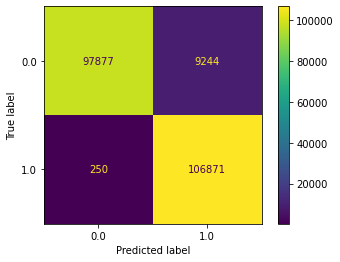

In [51]:
plot_confusion_matrix(grid.best_estimator_, X_train, Y_train)

### roc curve, confusion matrix, evaluation of model

In [53]:
y_score=clf.predict_proba(X_test)

In [54]:
y_score

array([[0.44385838, 0.55614162],
       [0.59222662, 0.40777338],
       [0.67954175, 0.32045825],
       ...,
       [0.50067561, 0.49932439],
       [0.59194454, 0.40805546],
       [0.44439292, 0.55560708]])

In [ ]:
y_class=clf.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_score).ravel()

NameError: name 'y_test' is not defined

In [ ]:
tn, fp, fn, tp 

## GridSearchCV SVC

In [55]:
grid = GridSearchCV(classifiers[1], parameters, scoring=customer_cout_metier_scorer) # SVC

In [56]:
grid.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(C=0.025, kernel='linear'), param_grid={},
             scoring=make_scorer(cout_metier))

In [58]:
grid.cv_results_

{'mean_fit_time': array([1997.3002944]),
 'std_fit_time': array([62.56540863]),
 'mean_score_time': array([242.94582443]),
 'std_score_time': array([18.84928805]),
 'params': [{}],
 'split0_test_score': array([79726.]),
 'split1_test_score': array([78946.]),
 'split2_test_score': array([77323.]),
 'split3_test_score': array([78908.]),
 'split4_test_score': array([79350.]),
 'mean_test_score': array([78850.6]),
 'std_test_score': array([819.96136494]),
 'rank_test_score': array([1], dtype=int32)}

/home/justin/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


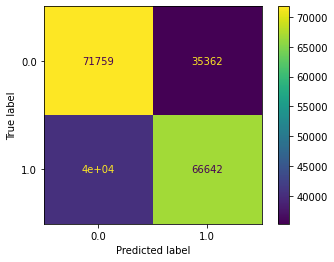

In [59]:
plot_confusion_matrix(grid.best_estimator_, X_train, Y_train)

In [ ]:
y_score=clf.predict_proba(X_test)

In [ ]:
y_class=clf.predict(X_test) # A préciser, on prend son score ou sa valeur prédiction???

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_class).ravel()

In [ ]:
tn, fp, fn, tp

## GridSearchCV RandomForest

In [ ]:
grid = GridSearchCV(classifiers[5], parameters, scoring=customer_cout_metier_scorer) # randomForest

In [ ]:
grid.fit(X_train, Y_train)

In [ ]:
grid.cv_results_

In [ ]:
plot_confusion_matrix(grid.best_estimator_, X_train, Y_train)

In [ ]:
y_score=clf.predict_proba(X_test)

In [ ]:
y_class=clf.predict(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_class).ravel()

In [ ]:
tn, fp, fn, tp

## GridSearchCV AdaboostClassifier

In [ ]:
grid = GridSearchCV(classifiers[7], parameters, scoring=customer_cout_metier_scorer) # AdaboostClassifier

In [ ]:
grid.fit(X_train, Y_train)

In [ ]:
grid.cv_results_

In [ ]:
plot_confusion_matrix(grid.best_estimator_, X_train, Y_train)

In [ ]:
y_class=clf.predict(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_class).ravel()

In [ ]:
tn, fp, fn, tp 